# Задание 2. Аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = \sin(\frac{x}{5}) * \exp(\frac{x}{10}) + 5 * \exp(\frac{-x}{2})$$

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... , w_n$ можно определить из следующей системы линейных уравнений:
$$\begin{cases}
w_0 + w_1 x_1 + w_2 x_1^2 + ... + w_n x_1^n = f(x_1) \\
... \\
w_0 + w_1 x_{n + 1} + w_2 x_{n + 1}^2 + ... + w_n x_{n + 1}^n = f(x_{n+1}) 
\end{cases}$$

где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: $w_0, w_1, w_2, w_3$) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 10
from scipy.linalg import solve

Исходная функция

In [10]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

x = [i for i in range(1, 16)]
y = np.array([f(i) for i in x])

__Отрисовка исходной функции__

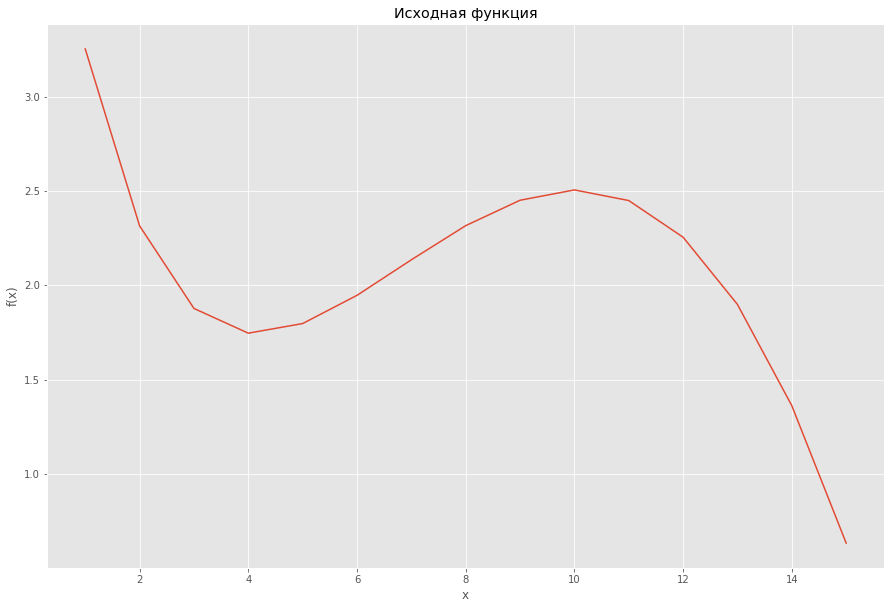

In [11]:
ax = sns.lineplot(x, y)
ax.set(xlabel='x', ylabel='f(x)', title='Исходная функция');

__Функция создает матричную форму системы линейных уравнений__

In [12]:
def create_matrix(points):
    matrix = []
    for i in points:
        matrix.append(np.array([i ** j for j in range(len(points))]))
    return np.array(matrix)

__Функция для интерполяции значений функции f(x)__

In [13]:
def interp(weights):
    new_y = []
    l = [i for i in range(len(weights))]
    ld = list(zip(l, list(weights)))
    for i in range(1, 16):
        new_y.append(sum([j[1] * (i ** j[0]) for j in ld]))
    return new_y

__Функция для построения графика и подсчета решений СЛАУ__

In [14]:
def solve_and_plot_graph(x_coord, y_coord, name):
    matrix = create_matrix(x_coord)
    solved = solve(matrix, y_coord)
    new_y = interp(solved)
    ax = sns.lineplot(x=x, y=new_y, label=name)
    ax.set(xlabel='x', ylabel='f(x)')
    return solved

__Изображение результатов аппроксимации__

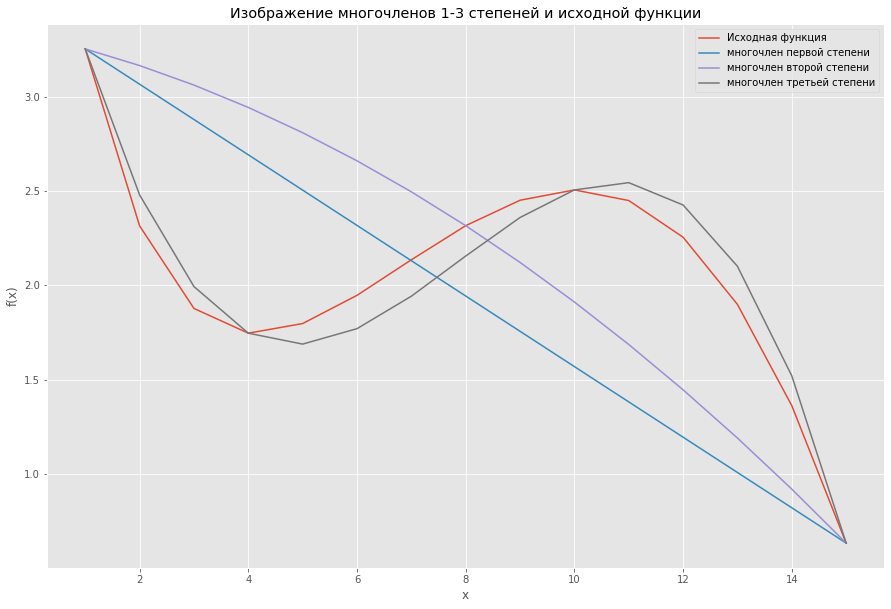

In [15]:
ax = sns.lineplot(x, y, label='Исходная функция')
weight_1 = solve_and_plot_graph([x[0], x[14]], [y[0], y[14]], 'многочлен первой степени')
weights_2 = solve_and_plot_graph([x[0], x[7], x[14]], [y[0], y[7], y[14]], 'многочлен второй степени')
weights_3 = solve_and_plot_graph([x[0], x[3], x[9], x[14]], [y[0], y[3], y[9], y[14]], 'многочлен третьей степени')
plt.legend()
plt.title('Изображение многочленов 1-3 степеней и исходной функции')
plt.show()

__Запись ответа в файл__

In [16]:
with open('answer2.txt', 'w') as f:
    answer = ' '.join([str(i) for i in weights_3])
    f.write(answer)